<a href="https://colab.research.google.com/github/alexc6h6/Recommendation-System/blob/master/Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Flatten, Embedding, Dot, Reshape
from tensorflow.keras.utils import plot_model
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import ReduceLROnPlateau


In [21]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
!ls '/content/drive/My Drive/ml-latest-small'

links.csv  movies.csv  ratings.csv  README.txt	tags.csv


In [23]:
data = pd.read_csv('/content/drive/My Drive/ml-latest-small/ratings.csv')

print(data.head())
print(data.shape)


   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
(100836, 4)


In [24]:
movie = pd.read_csv('/content/drive/My Drive/ml-latest-small/movies.csv')

print(movie.head())

   movieId  ...                                       genres
0        1  ...  Adventure|Animation|Children|Comedy|Fantasy
1        2  ...                   Adventure|Children|Fantasy
2        3  ...                               Comedy|Romance
3        4  ...                         Comedy|Drama|Romance
4        5  ...                                       Comedy

[5 rows x 3 columns]


In [0]:
user_le = LabelEncoder()
data['user_label'] = user_le.fit_transform(data['userId'])

In [0]:
movie_le = LabelEncoder()
data['movie_label'] = movie_le.fit_transform(data['movieId'])

In [27]:
print(data.head())

   userId  movieId  rating  timestamp  user_label  movie_label
0       1        1     4.0  964982703           0            0
1       1        3     4.0  964981247           0            2
2       1        6     4.0  964982224           0            5
3       1       47     5.0  964983815           0           43
4       1       50     5.0  964982931           0           46


In [54]:
n_user = len(data['user_label'].unique())
n_movie = len(data['movie_label'].unique())
print(n_user, n_movie)

610 9724


In [0]:
n_factor = 8

In [0]:
user_input = Input(shape = [1], name = 'user_input')
user_embed = Embedding(n_user, n_factor, name = 'user_embed')(user_input)
user_vec = Flatten(name = 'user_vec')(user_embed)

In [0]:
movie_input = Input(shape = [1], name = 'movie_input')
movie_embed = Embedding(n_movie, n_factor, name = 'movie_embed')(movie_input)
movie_vec = Flatten(name = 'movie_vec')(movie_embed)

In [58]:
prob = Dot(axes = 1, name = 'dot_product')([user_vec, movie_vec])

model = Model(inputs = [user_input, movie_input], outputs = prob)

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse', 'mae'])

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
movie_input (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
user_embed (Embedding)          (None, 1, 8)         4880        user_input[0][0]                 
__________________________________________________________________________________________________
movie_embed (Embedding)         (None, 1, 8)         77792       movie_input[0][0]                
____________________________________________________________________________________________

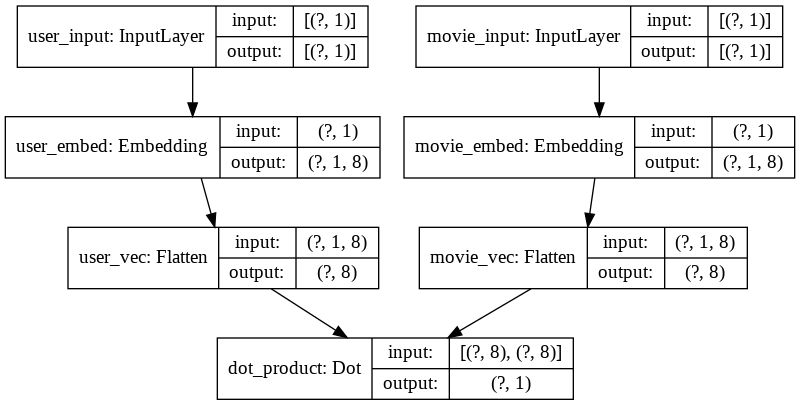

In [59]:
plot_model(model, show_shapes = True)

In [0]:
train_user = data['user_label'].values.reshape(-1, 1)
train_movie = data['movie_label'].values.reshape(-1, 1)
train_rating = data['rating'].values.reshape(-1, 1)


In [0]:
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', patience = 5, min_lr = 0, verbose = 1, factor = 0.33)

In [67]:
epochs = 50
batch = 128

train_history = model.fit([train_user, train_movie], train_rating, 
                          epochs = epochs, 
                          batch_size = batch,
                          verbose = 1, 
                          validation_split = 0.2, 
                          callbacks = [reduce_lr])

Epoch 1/50
631/631 [==============================] - 4s 6ms/step - loss: 1.0112 - mse: 1.0112 - mae: 0.7536 - val_loss: 1.0945 - val_mse: 1.0945 - val_mae: 0.7784 - lr: 0.0010
Epoch 2/50
631/631 [==============================] - 4s 6ms/step - loss: 0.9215 - mse: 0.9215 - mae: 0.7221 - val_loss: 1.0907 - val_mse: 1.0907 - val_mae: 0.7791 - lr: 0.0010
Epoch 3/50
631/631 [==============================] - 4s 6ms/step - loss: 0.8625 - mse: 0.8625 - mae: 0.7010 - val_loss: 1.0877 - val_mse: 1.0877 - val_mae: 0.7795 - lr: 0.0010
Epoch 4/50
631/631 [==============================] - 4s 6ms/step - loss: 0.8185 - mse: 0.8185 - mae: 0.6851 - val_loss: 1.0877 - val_mse: 1.0877 - val_mae: 0.7809 - lr: 0.0010
Epoch 5/50
631/631 [==============================] - 4s 6ms/step - loss: 0.7848 - mse: 0.7848 - mae: 0.6733 - val_loss: 1.0878 - val_mse: 1.0878 - val_mae: 0.7822 - lr: 0.0010
Epoch 6/50
631/631 [==============================] - 4s 6ms/step - loss: 0.7576 - mse: 0.7576 - mae: 0.6625 - val_

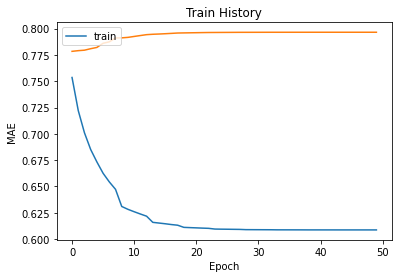

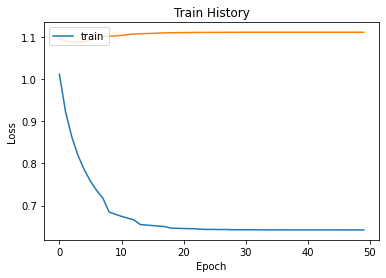

In [69]:


def show_train_history_mae(train_history):
    plt.plot(train_history.history['mae'])
    plt.plot(train_history.history['val_mae'])
    plt.title('Train History')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.legend(["train"], loc="upper left")
    plt.show()

def show_train_history_loss(train_history):
    plt.plot(train_history.history["loss"])
    plt.plot(train_history.history["val_loss"])
    plt.title("Train History")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["train"], loc="upper left")
    plt.show()

show_train_history_mae(train_history)    
show_train_history_loss(train_history)